In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [4]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
print(df.max())
df.head()

battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df2=pd.read_csv("/kaggle/input/mobile-price-classification/test.csv", index_col="id")
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [6]:
X_train = df.drop("price_range", axis=1)
y_train = df.price_range
X_test = X_train
y_test = y_train

from sklearn.preprocessing import StandardScaler

In [7]:
cols = X_train.columns.tolist()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)

print(pd.DataFrame(X_train, columns=cols).head())

   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.39

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model1 = RandomForestClassifier(random_state = 1)
model1.fit(X_train, y_train)

print(model1.predict(X_test))

[1 2 2 ... 3 0 3]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model1, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = cols)

Weight,Feature
0.6380 ± 0.0199,ram
0.1274 ± 0.0117,battery_power
0.0354 ± 0.0122,px_width
0.0245 ± 0.0018,px_height
0.0015 ± 0.0011,mobile_wt
0.0002 ± 0.0005,pc
0.0001 ± 0.0004,n_cores
0.0001 ± 0.0004,sc_h
0.0001 ± 0.0004,sc_w
0.0001 ± 0.0004,talk_time


In [10]:
from sklearn.model_selection import train_test_split

split = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
X2 = split.drop("price_range", axis=1)
y2 = split.price_range

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

<Axes: >

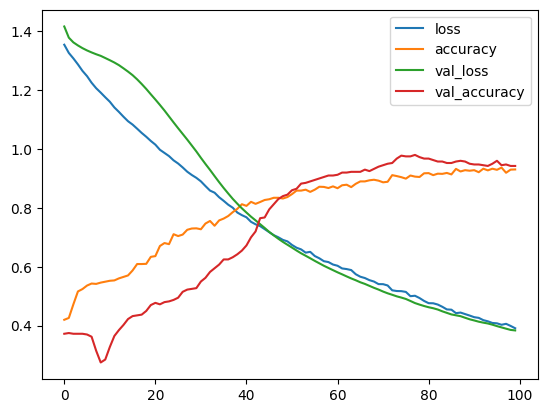

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[20]),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    X_train2, y_train2,
    validation_data=(X_test2, y_test2),
    batch_size=250,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.plot()

In [33]:
model1 = RandomForestClassifier(random_state = 11)
model1.fit(X_train2, y_train2)

temp = model1.predict(X_test2)
temp2 = y_test2.to_numpy()

error = 0
for i in range(0, len(temp)):
    if temp[i] != temp2[i]:
        error += 1
            
print(error)

49


In [36]:
len(temp2)

400